# Imports

In [1]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from scipy.ndimage.filters import gaussian_filter

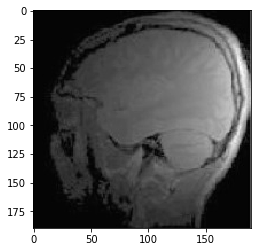

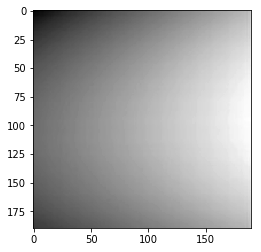

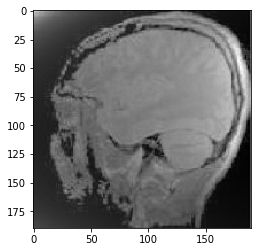

In [24]:
def normalizeMatrix(m):
    minB = np.min(m)
    norm = m-minB
    norm = norm/np.max(norm)
    return np.int64(norm*255)

img2 = mpimg.imread('img/2.JPG')  
img1 = mpimg.imread('img/1.JPG')  
img1 = img1[0:258,0:258,:]
img2 = img2[0:258,0:258,:]
img1 = rgb2gray(img1)
img2 = rgb2gray(img2)

plt.imshow(img1, cmap = cmapGray)
plt.show()
plt.imshow(img2, cmap = cmapGray)
plt.show()
result = img1/img2
result = normalizeMatrix(result)
plt.close()
plt.imshow(result, cmap = cmapGray)
plt.show()

# Load image and gaussian filtering

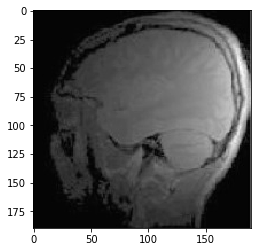

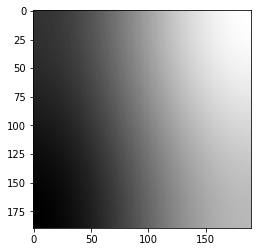

In [25]:
# np.set_printoptions(threshold=np.nan)
img = Image("img/1.jpg")

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('img/1.jpg')  
gray = rgb2gray(img) 
cmapGray = plt.get_cmap('gray')
plt.imshow(gray, cmap = cmapGray)
plt.show()

sizex = gray.shape[0]
sizey = gray.shape[1]
sigmaValue = np.int(np.floor((2 *sizex)/3))

blurred = gaussian_filter(gray, sigma=sigmaValue)
blurred = normalizeMatrix(blurred)
plt.imshow(blurred, cmap = cmapGray)
plt.show()

# 15 random points from the picture

In [26]:
# 15 losowych punktów z obrazu
coordx = np.int64(np.ceil(np.random.random((1, 20)) * (sizex-1)))
coordy = np.int64(np.ceil(np.random.random((1, 20)) * (sizey-1)))

print(coordx)
print(coordy)
print("")

values = blurred[coordx, coordy]
data = np.vstack([coordx, coordy, values]).T
print(data)

[[ 27  95  90  98  83 175  59   2   2  91 120 180  12 154  93 164  13  78
   23 169]]
[[114  76  47 152  19 181  40 187 183   2  60  99  31  91 117 150 181  14
   95  78]]

[[ 27 114 182]
 [ 95  76  93]
 [ 90  47  56]
 [ 98 152 199]
 [ 83  19  35]
 [175 181 184]
 [ 59  40  61]
 [  2 187 254]
 [  2 183 254]
 [ 91   2  27]
 [120  60  58]
 [180  99  99]
 [ 12  31  63]
 [154  91  91]
 [ 93 117 158]
 [164 150 168]
 [ 13 181 253]
 [ 78  14  35]
 [ 23  95 151]
 [169  78  69]]


# Curve fitting

[  3.00000000e+00   3.00000000e+00   8.80380071e-01   3.43338242e-12
   1.06740334e+00]
(36100, 2)
[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [189 187]
 [189 188]
 [189 189]]
(36100,)
[   3.            3.88038007    4.8449756  ...,  240.22946565  241.56669719
  242.90440826]
(190, 190)


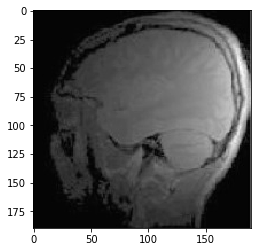

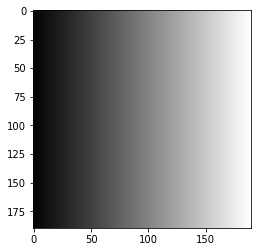

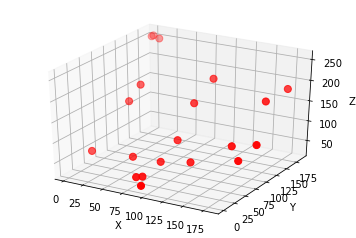

In [27]:
from scipy.optimize import curve_fit

def func(data, a, b, c, n, m):
    return a+(b*data[:,0]**n)+(c*data[:,1]**m)

guess = (1,1,1,1,1)
params, pcov = curve_fit(func, data[:,:2], data[:,2], guess, bounds=(0,3), max_nfev=2000)
print(params)
#z = func(data, *params)
#print(z)

#data2 = np.zeros((sizex,sizey))
data2 = np.indices((sizex,sizey)).reshape(2,-1).T
print(data2.shape)
print(data2)
F = func(data2, *params)
print(F.shape)
print(F)
F = F.reshape(sizex, sizey)
print(F.shape)

minF = np.min(F)
norm = F+np.abs(minF)
norm = norm/np.max(norm)
norm = norm*255
#print(norm)

plt.imshow((gray), cmap = cmapGray)
plt.show()
plt.imshow((norm), cmap = cmapGray)
plt.show()

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(coordx, coordy, values, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

# Surface fitting

In [ ]:
'''
# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)
'''
# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(0, sizex, 90), np.arange(0, sizey, 90))
XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

# Map generation

In [ ]:
# BiasSurface <- moja mapa niejednorodności
biasSurface = Z
print(biasSurface)
cmap = 'gray'
plt.imshow(biasSurface, cmap=cmap)
plt.show()

# Private notes

In [ ]:
'''x = np.arange(-5, 5, 0.025)
y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(x, y)
F = 3 + 2*X + 4*X*Y + 5*X*X

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F)
plt.show()'''